# Problem Set 5 Question 5.1

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [28]:
#construct the johnson data set
jsn_data = pd.DataFrame([['HR 1256', 2.63, 1.97],
               ['HR 1286', 3.36, 2.49],
               ['HR 1791', 1.97, 2.05],
               ['HR 1907', 2.45, 1.69],
               ['HR 1963', 2.89, 2.11],
               ['HR 2077', 2.09, 1.46],
               ['HR 2427', 2.79, 2.05],
               ['HR 3003', 2.28, 1.33],
               ['HR 4737', 2.55, 1.90],
               ['HR 4983', 3.24, 2.90]
               ], columns = ['Name', 'J', 'K'])

#Construct the KM data set
KM_data = pd.DataFrame([['HR 1256', 2.58, 1.98],
               ['HR 1286', 3.18, 2.40],
               ['HR 1791', 1.87, 1.96],
               ['HR 1907', 2.28, 1.68],
               ['HR 1963', 2.80, 2.07],
               ['HR 2077', 1.97, 1.40],
               ['HR 2427', 2.73, 2.05],
               ['HR 3003', 2.19, 1.30],
               ['HR 4737', 2.47, 1.87],
               ['HR 4983', 3.17, 2.87]
               ], columns = ['Name', 'J', 'K'])

#Convert just the color columns to numpy arrays to make the next section easier
jsn = jsn_data[['J', 'K']].to_numpy()
KM = KM_data[['J', 'K']].to_numpy()


To put each J and K value for the Johnson system in terms of the newer Kidger and Martin-Luis system, we need to fit the data above and solve for parameters ***b*** and ***m***:

$$\Delta J = m_J(J - k)_{\text{Johnson}} + b_J$$
$$\Delta K = m_K(J - k)_{\text{Johnson}} + b_K$$

where,

$$\Delta J = J_{KM} - J_{\text{Johnson}}$$
$$\Delta K = K_{KM} - K_{\text{Johnson}}$$



In [81]:
#form the independent (ie. color scale or (J - K)) axis:
J_K = np.zeros((jsn.shape[0]))
J_K[:] = jsn[:, 0] - jsn[:, 1]
sorted_args = np.argsort(J_K)
J_K = J_K[sorted_args]
print(sorted_args)
print(J_K)

#form the delta arrays (ie. \Delta J and \Delta K):
del_J = KM[:, 0] - jsn[:, 0]
del_K = KM[:, 1] - jsn[:, 1]
del_J = del_J[sorted_args]
del_K = del_K[sorted_args]

#define the fit function
def fit_fun(color_idx, m, b):
    return m*color_idx + b

[2 9 5 8 0 6 3 4 1 7]
[-0.08  0.34  0.63  0.65  0.66  0.74  0.76  0.78  0.87  0.95]


In [84]:
#perform the fit for both \Delta J and \Delta K
J_fitparams, J_cov = curve_fit(fit_fun, J_K, del_J)
K_fitparams, K_cov = curve_fit(fit_fun, J_K, del_K)
print(J_fitparams)
print(K_fitparams)

[-0.03245943 -0.08055056]
[ 0.04219725 -0.06358427]


Text(0, 0.5, '$\\Delta (wave \\ band)$')

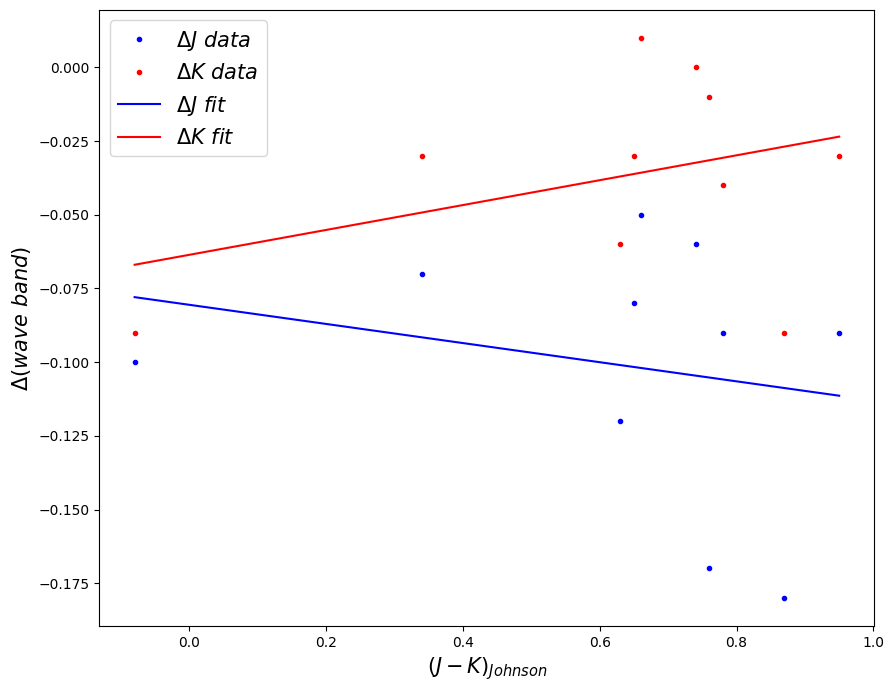

In [85]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.plot(J_K, del_J, '.', color = 'blue', label='$\Delta J \ data$')
plt.plot(J_K, del_K, '.', color = 'red', label='$\Delta K \ data$')
plt.plot(J_K, fit_fun(J_K, J_fitparams[0], J_fitparams[1]), color = 'blue', label = '$\Delta J \ fit$')
plt.plot(J_K, fit_fun(J_K, K_fitparams[0], K_fitparams[1]), color = 'red', label = '$\Delta K \ fit$')
plt.legend(fontsize = 15)
plt.xlabel('$(J - K)_{Johnson}$', fontsize = 15)
plt.ylabel('$\Delta (wave \ band)$', fontsize = 15)

So using the fit parameters found by fitting the data, we can see the equations above are:

$$\Delta J = -0.032(J - k)_{\text{Johnson}} - 0.081$$
$$\Delta K = 0.04(J - k)_{\text{Johnson}} - 0.063$$